In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

df = pd.read_csv("../dataset/abalone.csv",index_col=0)

In [57]:
# 데이터 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [59]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

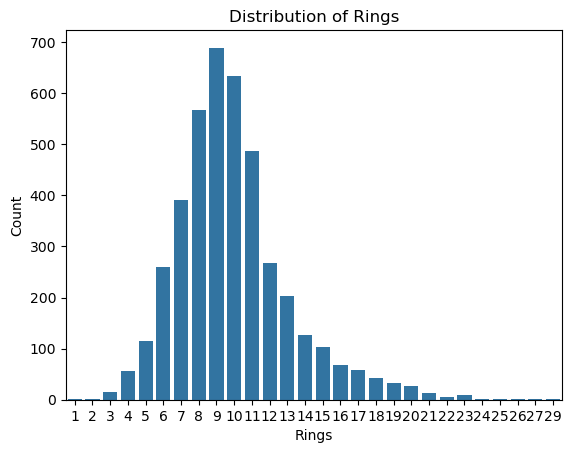

In [61]:
# 데이터 시각화: Rings 분포
sns.countplot(data=df, x="Rings")
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

In [63]:
# 결측치 확인
(df == 0).sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [65]:
# 결측치 제거
# Outcome 열을 제외한 나머지 열에서 0이 포함된 행을 제거
df = df[(df!= 0).all(axis=1)]

# 결과 출력
print(df.shape)  # 0 값이 제거된 후의 데이터 크기 확인

(4175, 9)


In [67]:
# Sex 값을 F -> 0, M -> 1로 변환
df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1, 'I':2})

/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_19304/377919716.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1, 'I':2})
/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_19304/377919716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1, 'I':2})


In [69]:
y_adjusted = y - 1
num_classes = np.max(y_adjusted) + 1

# one-hot encoding
y_categorical = tf.keras.utils.to_categorical(y_adjusted, num_classes=num_classes)

In [71]:
# 데이터셋을 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# 입력 데이터 차원 변경 (LSTM에 맞게)
X_train = X_train[:, :, np.newaxis]  # (샘플 수, 피처 수, 1)
X_test = X_test[:, :, np.newaxis]    # (샘플 수, 피처 수, 1)

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  # 다중 클래스 분류

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1419 - loss: 3.0189 - val_accuracy: 0.1794 - val_loss: 2.4328
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1464 - loss: 2.5724 - val_accuracy: 0.2242 - val_loss: 2.3051
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1736 - loss: 2.3827 - val_accuracy: 0.2377 - val_loss: 2.1837
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2209 - loss: 2.2846 - val_accuracy: 0.2167 - val_loss: 2.1656
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1944 - loss: 2.2882 - val_accuracy: 0.2197 - val_loss: 2.1981
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2293 - loss: 2.2395 - val_accuracy: 0.2078 - val_loss: 2.1186
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2337 - loss: 2.2144 - val_accuracy: 0.2466 - val_loss: 2.1503
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2398 - loss: 2.1738 - val_accuracy: 0.2377 - val_loss:

In [75]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2565 - loss: 2.1384 
Test Loss: 2.0879955291748047, Test Accuracy: 0.2667464017868042


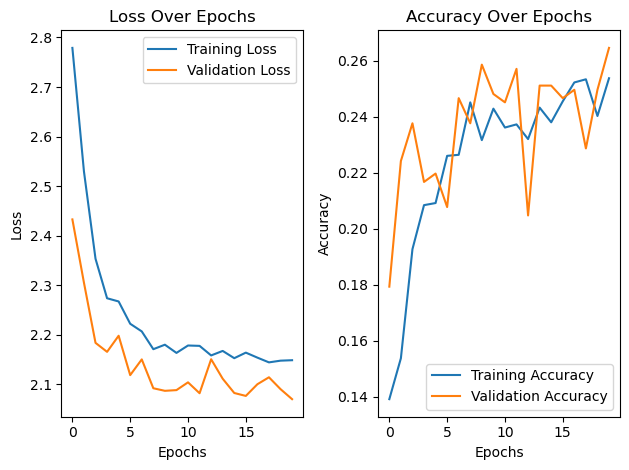

In [81]:
# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()